In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from PIL import Image
%matplotlib inline
import os

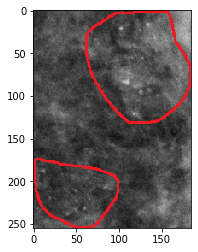

In [7]:
file_Path = 'G:/Xinhua/ROI/A/29-LM-roi.bmp'
roi_im = Image.open(file_Path)
plt.imshow(roi_im)

In [8]:
def pixel_wanted(pix):
    return pix==(237,28, 36)

In [9]:
def Cal_S(im):
    coordinateList = []
    top_pixel = (0,0,0)
    for x in range(im.size[0]):
        flag=False
        for y in range(im.size[1]):
            current_pixel = im.getpixel((x,y))
            last_pixel = im.getpixel((x,y-1)) if y>0 else top_pixel
            if pixel_wanted(current_pixel)and not pixel_wanted(last_pixel):
                flag = True
            if flag and not pixel_wanted(current_pixel):
                flag = False
            if(flag):
                coordinateList.append((x,y))
    min_max_coordinate_list=[]
    for i in range(im.size[0]):
        min=-1
        max=-1
        for coordinate in coordinateList:
            if coordinate[0]==i:
                min = coordinate[1]
                max = coordinate[1]
                break
        for coordinate in coordinateList:
            if coordinate[0]==i:
                if coordinate[1]>max:
                    max = coordinate[1]
        min_max_coordinate_list.append(min)
        min_max_coordinate_list.append(max)
    i=0;
    for x in range(im.size[0]):
        for y in range(im.size[1]):
            min = min_max_coordinate_list[x*2]
            max = min_max_coordinate_list[x*2+1]
            if min<y<max:
                im.putpixel((x,y),(0,255,0))
                i+=1
            else:
                pass
#                 im.putpixel((x,y),(147,147,147))
    return im

In [10]:
import os
from PIL import Image

#打开图片
def image_open(path, filename):
    try:
        Image.open(path+'/'+filename)
    except:
        print("打开"+filename+"图片失败")
    else:
        return Image.open(path+'/'+filename)

#保存图片
def image_save(im, path, filename):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
        im.save(path + '/' + filename)
    except:
        print('图片'+filename+'保存失败')

In [11]:
def Cal_S2(im):
    coordinateList = []
    top_pixel = (0,0,0)
    for y in range(im.size[1]):
        flag=False
        for x in range(im.size[0]):
            current_pixel = im.getpixel((x,y))
            last_pixel = im.getpixel((x-1,y)) if x>0 else top_pixel
            if pixel_wanted(current_pixel)and not pixel_wanted(last_pixel):
                flag = True
            if flag and not pixel_wanted(current_pixel):
                flag = False
            if(flag):
                coordinateList.append((x,y))
    min_max_coordinate_list=[]
    for i in range(im.size[1]):
        min=-1
        max=-1
        for coordinate in coordinateList:
            if coordinate[1]==i:
                min = coordinate[0]
                max = coordinate[0]
                break
        for coordinate in coordinateList:
            if coordinate[1]==i:
                if coordinate[0]>max:
                    max = coordinate[0]
                if coordinate[0]<min:
                    min = coordinate[0]
        min_max_coordinate_list.append(min)
        min_max_coordinate_list.append(max)
    for y in range(im.size[1]):
        for x in range(im.size[0]):
            min = min_max_coordinate_list[y*2]
            max = min_max_coordinate_list[y*2+1]
            if min<x<max:
                im.putpixel((x,y),(0,255,0))
            else:
                pass
    return im

In [21]:
def Final(file_Path):
    roi_im = Image.open(file_Path)
    im1 = Cal_S(roi_im)
    plt.figure()
    plt.imshow(im1)
    roi_im = Image.open(file_Path)
    im2 = Cal_S2(roi_im)
    plt.figure()
    plt.imshow(im2)
    roi_im = Image.open(file_Path)
    for x in range(im1.size[0]):
        for y in range(im1.size[1]):
            if(im1.getpixel((x,y))==(0,255,0) and im2.getpixel((x,y))==(0,255,0)):
                roi_im.putpixel((x,y),(0,255,0))
            
    return roi_im

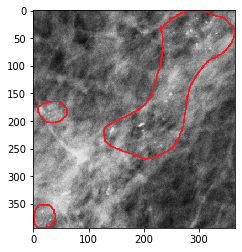

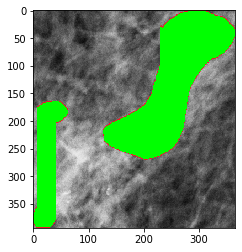

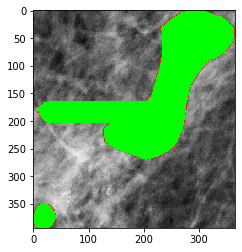

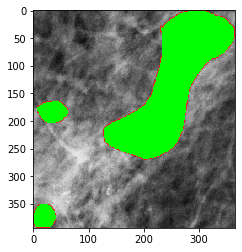

In [22]:
file_Path = 'G:/Xinhua/ROI/C/87-RM-roi.bmp'
plt.figure()
plt.imshow(Image.open(file_Path))
im = Final(file_Path)
plt.figure()
plt.imshow(im)

In [12]:
file_Path = 'G:/Xinhua/ROI/C/'
save_Path = 'G:/Xinhua/ROI_Cal_3.0/C'
fileNameList = []
for _,_,fileNames in os.walk(file_Path):
    for fileName in fileNames:
        if 'roi' in fileName:
            fileNameList.append(fileName)
for fileName in fileNameList:
    im = Final(file_Path+fileName)
    roi_im = Image.open(file_Path+fileName)
    image_save(im, save_Path, fileName.replace('.bmp','-show.bmp'))
    image_save(roi_im,save_Path,fileName)

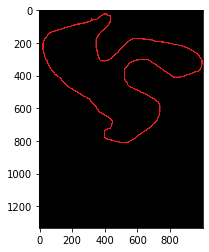

In [39]:
im = Image.open('C:/Users/19116/Desktop/Test.png')
plt.imshow(im)

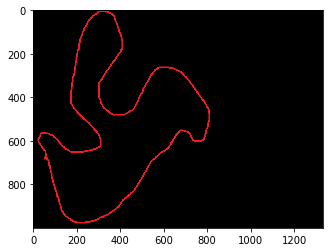

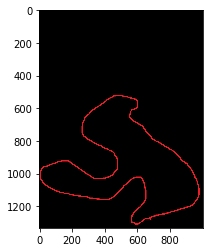

In [40]:
im2 = im.rotate(90,expand=True)
im180 = im.rotate(180,expand=True)
plt.imshow(im2)
plt.figure()
plt.imshow(im180)

In [41]:
im3 = Cal_S(im)
im4 = Cal_S(im2).rotate(-90, expand=True)

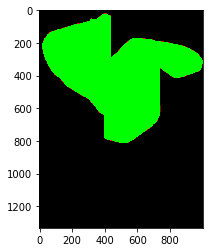

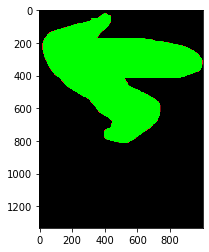

In [42]:
plt.imshow(im3)
plt.figure()
plt.imshow(im4)

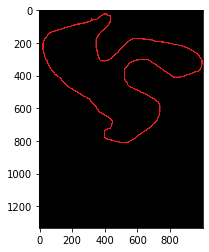

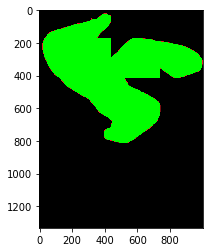

In [38]:
im = Image.open('C:/Users/19116/Desktop/Test.png')
plt.imshow(im)
plt.figure()
for x in range(im3.size[0]):
        for y in range(im3.size[1]):
            if(im3.getpixel((x,y))==(0,255,0) and im4.getpixel((x,y))==(0,255,0)):
                im.putpixel((x,y),(0,255,0))
plt.imshow(im)